In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('/Users/amaanqureshi/Downloads/simulated_transaction_2024.csv')

In [3]:
df.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [7]:
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Timestamp'])

data_sorted = data.sort_values(by=['Datetime'], ascending=True)

latest_balances = data_sorted.groupby('Account No').last().reset_index()

balance_distribution = latest_balances['Balance'].describe()
balance_distribution

count      976.000000
mean      2352.703623
std       5192.757497
min      -5638.880000
25%       -288.898426
50%        716.916456
75%       2851.331126
max      36917.962170
Name: Balance, dtype: float64

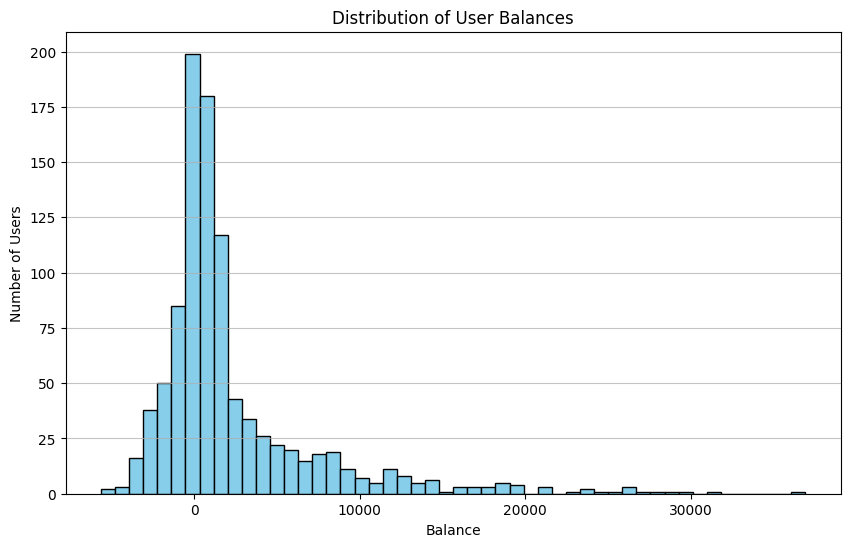

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(latest_balances['Balance'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of User Balances')
plt.xlabel('Balance')
plt.ylabel('Number of Users')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [17]:
unique_dates_count = df['Date'].nunique()
print(unique_dates_count)


340


In [23]:
balance_count = df['Balance'].nunique()
print(balance_count)

229888


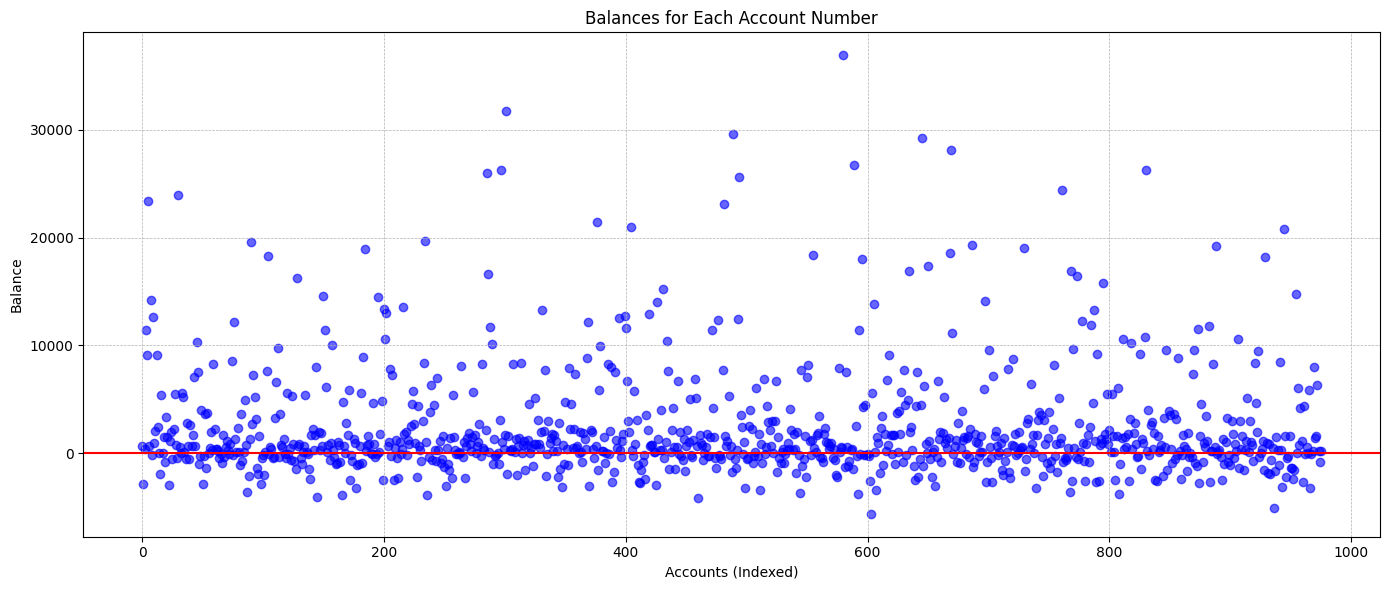

In [33]:
plt.figure(figsize=(14, 6))

plt.scatter(range(len(latest_balances)), latest_balances['Balance'], color='blue', alpha=0.6)
plt.title('Balances for Each Account Number')
plt.xlabel('Accounts (Indexed)')
plt.ylabel('Balance')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.axhline(y=0, color='r', linestyle='-')

plt.show()